# Neural Network

## Perceptron
A perceptron is a single neuron model that was a precursor to larger neural networks.
It is a type of linear classifier, meaning that it classifies input by separating two categories with a straight line.
A perceptron has one or more inputs, a bias, an activation function, and a single output.
The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output.
There are many possible activation functions to choose from, such as the logistic function, a trigonometric function, a step function etc.
The purpose of the activation function is to introduce non-linearity into the output of a neuron.

### Perceptron as Logical Operators

#### 1. AND Perceptron

- If both inputs are true then only the output is true.

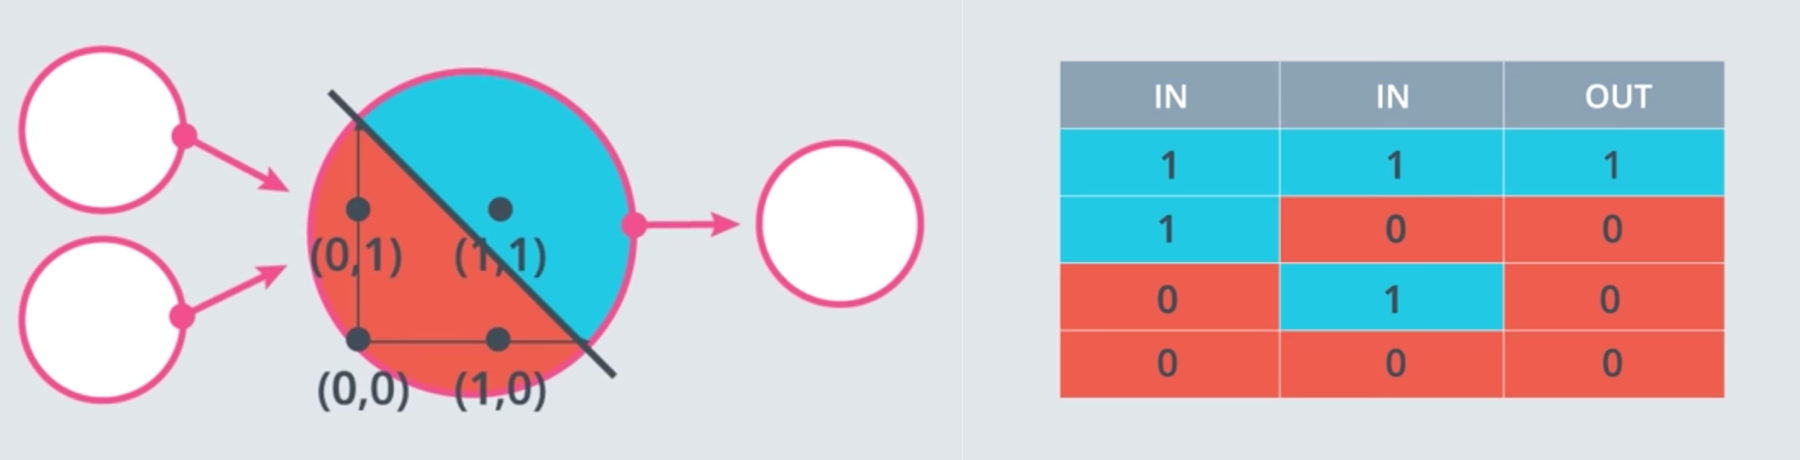

#### 2. OR Perceptron

- If any one of the input is true then only the output is true.

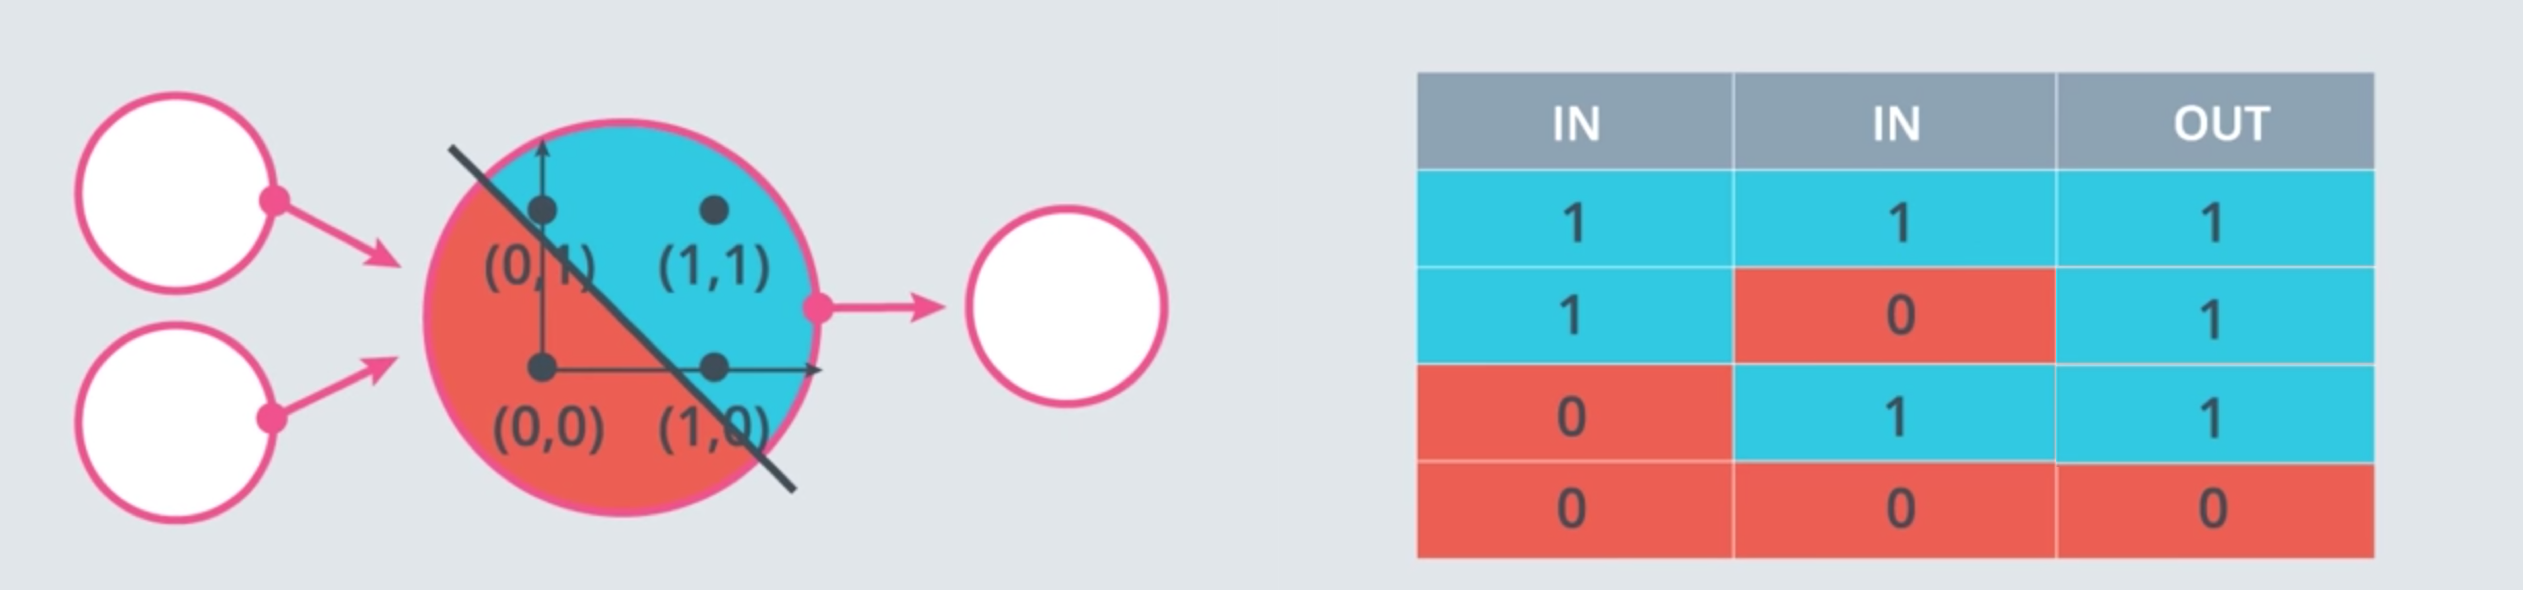

## Two ways to go from an AND perceptron to an OR perceptron

- Increase the weights
- Decrease the magnitude of the bias

#### 3. NOT Perceptron

- If the input is true then the output is false.
- The other inputs to the perceptron are ignored.

#### 3. XOR Perceptron

- If both inputs are different then the output is true.

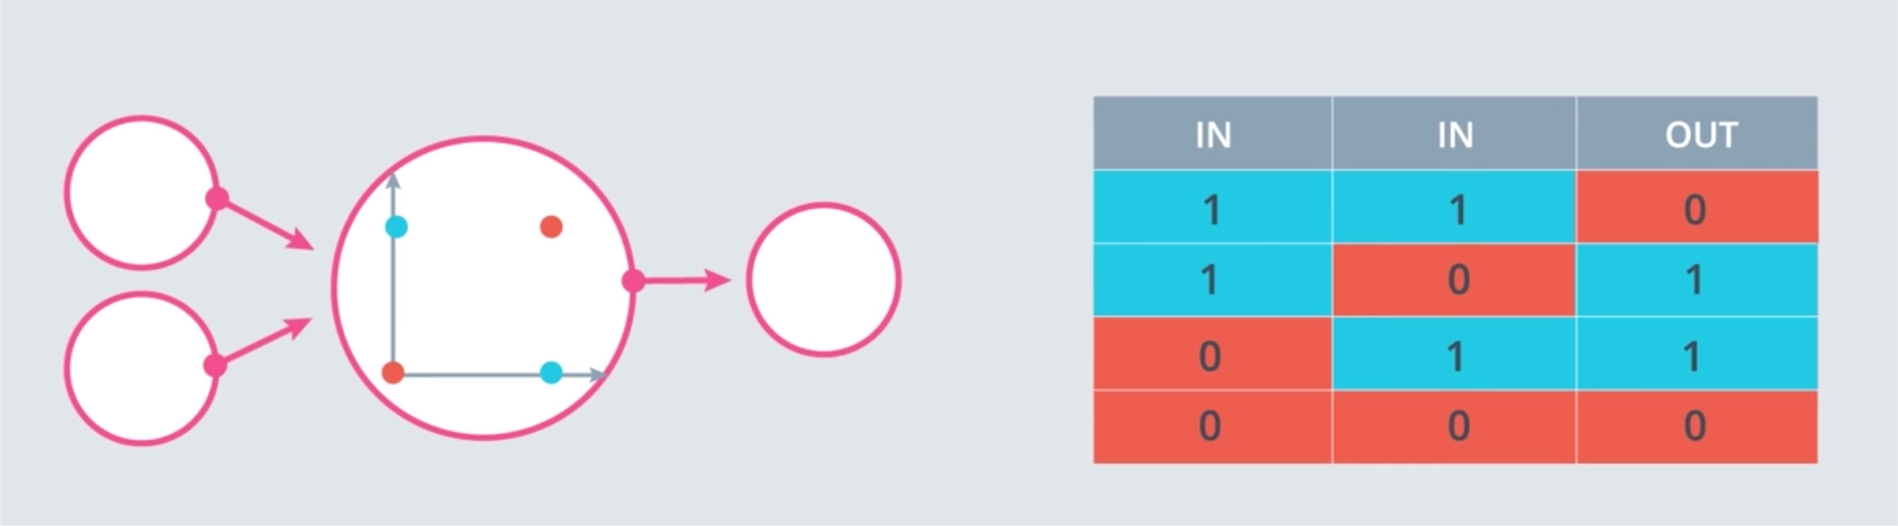


In [ ]:

# Set and_weight1, and_weight2, and and_bias for AND perceptron
# Note that the sum of weights must be greater than the bias
and_weight1 = 1
and_weight2 = 1
and_bias = -1.5

# Set and_weight1, and_weight2, and and_bias for OR perceptron
# Note that the weights must be greater than the bias
or_weight1 = 1
or_weight2 = 1
or_bias = -0.5

# Set and_weight1, and_weight2, and and_bias for NOT perceptron
# Note that one weight must be zero and the other less than the bias
not_weight1 = 0
not_weight2 = -1
not_bias = 0.5

## Perceptron trick
Goal: Split data

If the learning rate is set to 0.1, how many times would you have to apply the perceptron trick to move the line to a position where a misclassified blue point at (1, 1) would be correctly classified?

- Add by same number (i.e Learning rate 0.1 to all weights and bias each step)
- Repeat the trick until it is equal or greater than 0 and count how many steps you did

Then for 1st step:
3 -> 3.1 -- 4 -> 4.1  -- -10 -> -9.9

For 2nd step:
3.1 -> 3.2 -- 4.1 -> 4.2 -- -9.9 -> -9.8

$\vdots$

For 10th step:
3.9 -> 4 -- 4.9 -> 5 -- -9.1 -> -9.0
4.(1) + 5.(1) -9 = 0 so it just touches the line

## Perceptron Algorithm

1. Start with random weights: $w_1, \ldots, w_n, b$
2. For every misclassified point $(x_1, \ldots, x_n):$
   1. If prediction = 0:
      - For i = 1 $\ldots$ n
        - Change $w_i +\alpha.x_i$
      - Change b to $b+\alpha$
   2. If prediction = 1:
      - For i = 1 $\ldots$ n
        - Change $w_i -\alpha.x_i$
      - Change b to $b-\alpha$

      


In [2]:
# Use perceptron algorithm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setting the random seed
# Feel free to change it to see different solutions
np.random.seed(42)

def step_function(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    """
    The function should receive as inputs the data X, the labels y, the
    weights W (as an array), and the bias b, update the weights and bias
    W, b, according to the perceptron algorithm, and return W and b.
    """
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - y_hat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b

# Testing your algorithm code

X_test = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
y_test = np.array([1,1,0,0])
W_test = np.array([[0.5], [0.5]])
b_test = 0.5

output_W, output_b = perceptron_step(
    X_test,
    y_test,
    W_test,
    b_test,
    0.01
)
solution_W = np.array([[ 0.51],[ 0.49]])
solution_b = 0.49
if np.array_equal(output_W, solution_W) and output_b == solution_b:
    print("Nice work coding the perceptron algorithm!")
else:
    print("Try again. For perceptron_step(\n{}, \n{}, \n{}, \n{}, \
\n{}\n)\nthe expected result was \nW=\n{}\nand b={}, but your output \
was \nW=\n{}\nand b={}".format(
        X_test,
        y_test,
        W_test,
        b_test,
        0.01,
        solution_W,
        solution_b,
        output_W,
        output_b
    ))

Nice work coding the perceptron algorithm!


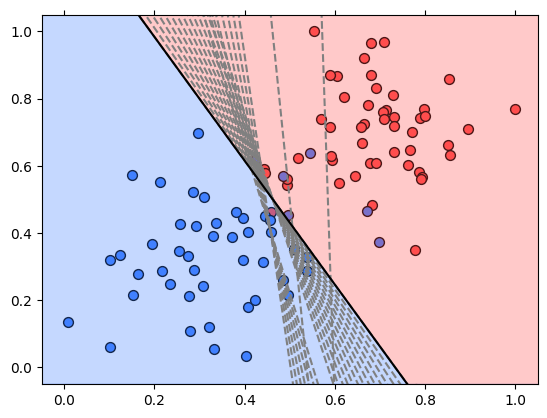

In [8]:
# Train perceptron algorithm

def train_perceptron_algorithm(X, y, learn_rate=0.01, num_epochs=25):
    """
    This function runs the perceptron algorithm repeatedly on the dataset,
    and returns a few of the boundary lines obtained in the iterations,
    for plotting purposes.
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptron_step(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

def plot_line(m, b, linestyle='dashed', color='gray', fill=False):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-10.0, 10.0, 0.1)
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
        plt.fill_between(x, m*x+b, -0.05, color=blue, alpha=0.3)
        plt.fill_between(x, m*x+b, 1.05, color=red, alpha=0.3)
        
# Load data
data = np.asarray(pd.read_csv("data.csv", header=None))
X = data[:,0:2]
y = data[:,2]

# Get list of boundary lines
# Feel free to play with the learning rate and the num_epochs, and see
# your results plotted below
boundary_lines = train_perceptron_algorithm(X, y)

# Set up plot styling
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')

# Plot data points
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')

# Plot boundary lines and solution regions
for line in boundary_lines:
    slope = line[0]
    b = line[1]
    plot_line(slope, b)
solution_slope = boundary_lines[-1][0]
solution_intercept = boundary_lines[-1][1]
plot_line(solution_slope, solution_intercept, 'solid', 'k', True)

## Error function

- An error function is a function that calculates the distance between the current state from the solution.
- The goal is to reduce the error or distance repeating the process until we have reduced the distance to an acceptable level.

### Log-Loss Error function

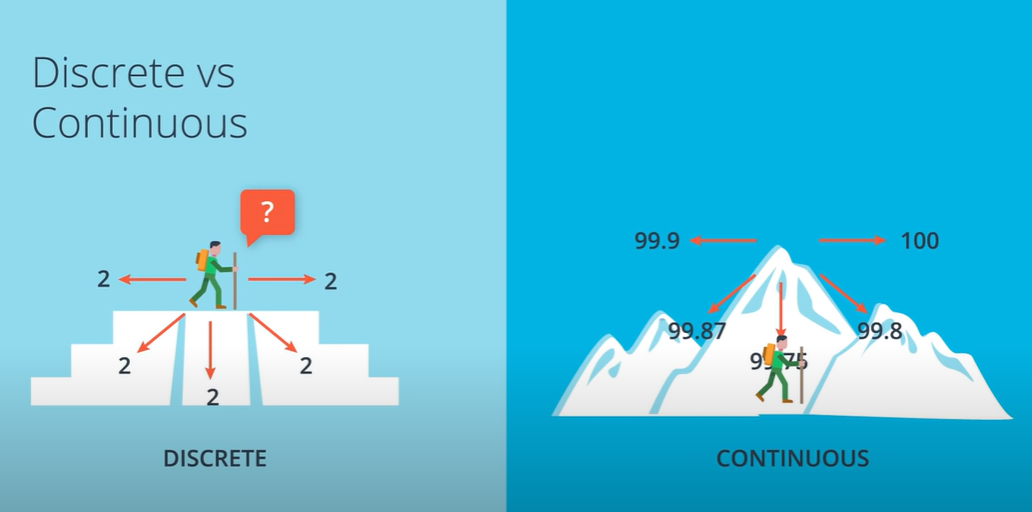

Note that the error function needs to be continuous and differentiable.

- Gradient descent
- Activation functions

### Predictions

- A discrete number will be of the form 'yes' or 'no'.
- A continuous number will be a number, normally between 0 and 1.

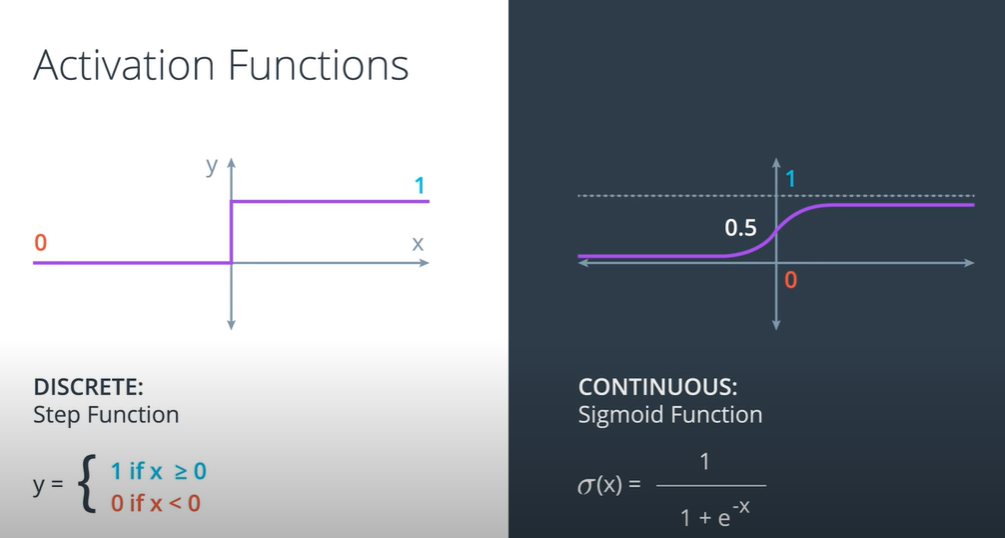

### Multi-class classification and Softmax

- To get a number ratio from multiple numbers, we can divide the number by total sum of all numbers. 
- But it is not applicable when there is negative numbers.
- So, a better option is to take an $e^x$ for all number $x$ because he exponential function only returns positive values.
- This gives us a function called Softmax.

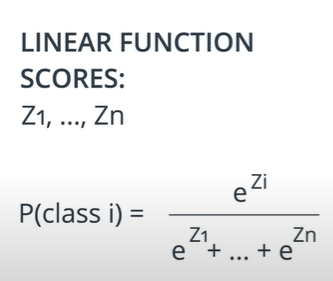



In [9]:
import numpy as np

# TODO: complete the function
def softmax(L):
    """
    This function takes as input a list of numbers, and returns the list
    of values given by the softmax function.
    """

    return np.exp(L) / np.sum(np.exp(L))

print(softmax([1,3,4]))

[0.03511903 0.25949646 0.70538451]


## One-Hot Encoding

- Not always the output is numbers, the output can be non- numerical sometimes.
- During such case, we create new variables that defines different non-numerical output and give its value 1 when it exists and 0 otherwise.

## Maximum Likelihood

- When we want to know best line that fits, we can calculate total probability P(all) which is the product of all independent probabilities of the data and we want to maximize the total probability.

## Cross Entropy

- Note that log function converts a product into sum. So, we use log with probability to get the sum.
- But we will use natural log function.
- But log of a probbility (number from 0 to 1) gives us a negative number so we take negative of log(n).
$-log(P) = +ve$
- So, this converts product into sum of negative logarithms of probabilities which is called cross-entropy.
- A high cross-entropy indicates a bad model as its negative of logarithm of small probability is large.
- A low cross-entropy indicates a good model as its negative of logarithm of large probability is small.